# Determine drifters that pass through a bounding box

## Read Drifter Data from EcoFOCI web

1986-2015 Quality Controlled Data is available from https://www.ecofoci.noaa.gov/drifters/efoci_drifterData.shtml

Formats and options change (as do headerlines and meta information) throughout the window of time available.  Usually, all files of a given year are well documented and similar.

In [1]:
import pandas as pd
import numpy as np

import datetime as dt

In [2]:
import ssl

#to get past a pandas ssl issue with foci website
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
#data directory

floats = ['data1986/02325_y1986.asc',
'data1986/02326_y1986.asc',
'data1986/02327_y1986.asc',
'data1986/02328_y1986.asc',
'data1986/02329_y1986.asc',
'data1986/05611a_y1986.asc',
'data1986/05611b_y1986.asc',
'data1986/05612_y1986.asc',
'data1986/07160a_y1986.asc',
'data1986/07160b_y1986.asc',
'data1986/07163_y1986.asc',
'data1986/07164_y1986.asc',
'data1986/07165_y1986.asc',
'data1986/y1986_02325.asc',
'data1986/y1986_02326.asc',
'data1986/y1986_02327.asc',
'data1986/y1986_02328.asc',
'data1986/y1986_02329.asc',
'data1986/y1986_05611.asc',
'data1986/y1986_07160.asc',
'data1986/y1986_07163.asc',
'data1986/y1986_07164.asc',
'data1986/y1986_07165.asc',
'data1987/07220_y1987.asc',
'data1987/07221_y1987.asc',
'data1987/07224_y1987.asc',
'data1987/07225_y1987.asc',
'data1987/07226_y1987.asc',
'data1987/07227_y1987.asc',
'data1987/07230_y1987.asc',
'data1987/07233a_y1987.asc',
'data1987/07233b_y1987.asc',
'data1987/07236_y1987.asc',
'data1987/07237_y1987.asc',
'data1987/07239_y1987.asc',
'data1987/07240_y1987.asc',
'data1987/07241_y1987.asc',
'data1987/07242_y1987.asc',
'data1987/07243_y1987.asc',
'data1987/07244_y1987.asc',
'data1987/y1987_07220.asc',
'data1987/y1987_07221.asc',
'data1987/y1987_07224.asc',
'data1987/y1987_07225.asc',
'data1987/y1987_07226.asc',
'data1987/y1987_07227.asc',
'data1987/y1987_07230.asc',
'data1987/y1987_07233.asc',
'data1987/y1987_07236.asc',
'data1987/y1987_07237.asc',
'data1987/y1987_07239.asc',
'data1987/y1987_07240.asc',
'data1987/y1987_07241.asc',
'data1987/y1987_07242.asc',
'data1987/y1987_07243.asc',
'data1987/y1987_07244.asc',
'data1988/07209a_y1988.asc',
'data1988/07209b_y1988.asc',
'data1988/07210_y1988.asc',
'data1988/07211_y1988.asc',
'data1988/07212_y1988.asc',
'data1988/07213_y1988.asc',
'data1988/07214_y1988.asc',
'data1988/07256_y1988.asc',
'data1988/y1988_07209.asc',
'data1988/y1988_07210.asc',
'data1988/y1988_07211.asc',
'data1988/y1988_07212.asc',
'data1988/y1988_07213.asc',
'data1988/y1988_07214.asc',
'data1988/y1988_07256.asc',
'data1989/07160_y1989.asc',
'data1989/07161_y1989.asc',
'data1989/07162_y1989.asc',
'data1989/07164_y1989.asc',
'data1989/07165_y1989.asc',
'data1989/07166_y1989.asc',
'data1989/07167_y1989.asc',
'data1989/07168_y1989.asc',
'data1989/07169_y1989.asc',
'data1989/y1989_07160.asc',
'data1989/y1989_07161.asc',
'data1989/y1989_07162.asc',
'data1989/y1989_07164.asc',
'data1989/y1989_07165.asc',
'data1989/y1989_07166.asc',
'data1989/y1989_07167.asc',
'data1989/y1989_07168.asc',
'data1989/y1989_07169.asc',
'data1990/07212_y1990.asc',
'data1990/07213_y1990.asc',
'data1990/07214_y1990.asc',
'data1990/07220_y1990.asc',
'data1990/07221_y1990.asc',
'data1990/07224_y1990.asc',
'data1990/07225_y1990.asc',
'data1990/07226_y1990.asc',
'data1990/07227_y1990.asc',
'data1990/07228_y1990.asc',
'data1990/07229_y1990.asc',
'data1990/07230_y1990.asc',
'data1990/07232_y1990.asc',
'data1990/07233_y1990.asc',
'data1990/07235a_y1990.asc',
'data1990/07235b_y1990.asc',
'data1990/07236_y1990.asc',
'data1990/07237_y1990.asc',
'data1990/y1990_07212.asc',
'data1990/y1990_07213.asc',
'data1990/y1990_07214.asc',
'data1990/y1990_07220.asc',
'data1990/y1990_07221.asc',
'data1990/y1990_07224.asc',
'data1990/y1990_07225.asc',
'data1990/y1990_07226.asc',
'data1990/y1990_07227.asc',
'data1990/y1990_07228.asc',
'data1990/y1990_07229.asc',
'data1990/y1990_07230.asc',
'data1990/y1990_07232.asc',
'data1990/y1990_07233.asc',
'data1990/y1990_07235.asc',
'data1990/y1990_07236.asc',
'data1990/y1990_07237.asc',
'data1991/00232_y1991.asc',
'data1991/00237_y1991.asc',
'data1991/07160_y1991.asc',
'data1991/07161_y1991.asc',
'data1991/07162_y1991.asc',
'data1991/07163_y1991.asc',
'data1991/07165_y1991.asc',
'data1991/07166_y1991.asc',
'data1991/07167_y1991.asc',
'data1991/07168a_y1991.asc',
'data1991/07168b_y1991.asc',
'data1991/07169_y1991.asc',
'data1991/07170_y1991.asc',
'data1991/07171_y1991.asc',
'data1991/07172_y1991.asc',
'data1991/07173_y1991.asc',
'data1991/07174_y1991.asc',
'data1991/07209_y1991.asc',
'data1991/07210_y1991.asc',
'data1991/07211_y1991.asc',
'data1991/07224_y1991.asc',
'data1991/07226_y1991.asc',
'data1991/07227_y1991.asc',
'data1991/07237_y1991.asc',
'data1991/07238_y1991.asc',
'data1991/07239_y1991.asc',
'data1991/07240_y1991.asc',
'data1991/07241_y1991.asc',
'data1991/07242_y1991.asc',
'data1991/07243_y1991.asc',
'data1991/07244_y1991.asc',
'data1991/y1991_00232.asc',
'data1991/y1991_00237.asc',
'data1991/y1991_07160.asc',
'data1991/y1991_07161.asc',
'data1991/y1991_07162.asc',
'data1991/y1991_07163.asc',
'data1991/y1991_07165.asc',
'data1991/y1991_07166.asc',
'data1991/y1991_07167.asc',
'data1991/y1991_07168.asc',
'data1991/y1991_07169.asc',
'data1991/y1991_07170.asc',
'data1991/y1991_07171.asc',
'data1991/y1991_07172.asc',
'data1991/y1991_07173.asc',
'data1991/y1991_07174.asc',
'data1991/y1991_07209.asc',
'data1991/y1991_07210.asc',
'data1991/y1991_07211.asc',
'data1991/y1991_07224.asc',
'data1991/y1991_07226.asc',
'data1991/y1991_07227.asc',
'data1991/y1991_07237.asc',
'data1991/y1991_07238.asc',
'data1991/y1991_07239.asc',
'data1991/y1991_07240.asc',
'data1991/y1991_07241.asc',
'data1991/y1991_07242.asc',
'data1991/y1991_07243.asc',
'data1991/y1991_07244.asc',
'data1992/07161_y1992.asc',
'data1992/07162_y1992.asc',
'data1992/07164_y1992.asc',
'data1992/07165_y1992.asc',
'data1992/07167_y1992.asc',
'data1992/07168_y1992.asc',
'data1992/07169_y1992.asc',
'data1992/07170_y1992.asc',
'data1992/07211_y1992.asc',
'data1992/07213_y1992.asc',
'data1992/07214_y1992.asc',
'data1992/07220_y1992.asc',
'data1992/07221_y1992.asc',
'data1992/07225_y1992.asc',
'data1992/07227_y1992.asc',
'data1992/07229_y1992.asc',
'data1992/07233_y1992.asc',
'data1992/07235_y1992.asc',
'data1992/07236_y1992.asc',
'data1992/y1992_07161.asc',
'data1992/y1992_07162.asc',
'data1992/y1992_07164.asc',
'data1992/y1992_07165.asc',
'data1992/y1992_07167.asc',
'data1992/y1992_07168.asc',
'data1992/y1992_07169.asc',
'data1992/y1992_07170.asc',
'data1992/y1992_07211.asc',
'data1992/y1992_07213.asc',
'data1992/y1992_07214.asc',
'data1992/y1992_07220.asc',
'data1992/y1992_07221.asc',
'data1992/y1992_07225.asc',
'data1992/y1992_07227.asc',
'data1992/y1992_07229.asc',
'data1992/y1992_07233.asc',
'data1992/y1992_07235.asc',
'data1992/y1992_07236.asc',
'data1993/00237_y1993.asc',
'data1993/07161_y1993.asc',
'data1993/07165_y1993.asc',
'data1993/07168_y1993.asc',
'data1993/07169_y1993.asc',
'data1993/07170_y1993.asc',
'data1993/07172_y1993.asc',
'data1993/07210_y1993.asc',
'data1993/07211_y1993.asc',
'data1993/07212_y1993.asc',
'data1993/07214_y1993.asc',
'data1993/07225_y1993.asc',
'data1993/07226_y1993.asc',
'data1993/07228_y1993.asc',
'data1993/07235_y1993.asc',
'data1993/07238_y1993.asc',
'data1993/07239_y1993.asc',
'data1993/07242_y1993.asc',
'data1993/07243_y1993.asc',
'data1993/07244_y1993.asc',
'data1993/07780_y1993.asc',
'data1993/07781_y1993.asc',
'data1993/y1993_00237.asc',
'data1993/y1993_07161.asc',
'data1993/y1993_07165.asc',
'data1993/y1993_07168.asc',
'data1993/y1993_07169.asc',
'data1993/y1993_07170.asc',
'data1993/y1993_07172.asc',
'data1993/y1993_07210.asc',
'data1993/y1993_07211.asc',
'data1993/y1993_07212.asc',
'data1993/y1993_07214.asc',
'data1993/y1993_07225.asc',
'data1993/y1993_07226.asc',
'data1993/y1993_07228.asc',
'data1993/y1993_07235.asc',
'data1993/y1993_07238.asc',
'data1993/y1993_07239.asc',
'data1993/y1993_07242.asc',
'data1993/y1993_07243.asc',
'data1993/y1993_07244.asc',
'data1993/y1993_07780.asc',
'data1993/y1993_07781.asc',
'data1994/00232_y1994.asc',
'data1994/07160_y1994.asc',
'data1994/07166_y1994.asc',
'data1994/07167_y1994.asc',
'data1994/07168_y1994.asc',
'data1994/07171_y1994.asc',
'data1994/07172_y1994.asc',
'data1994/07173_y1994.asc',
'data1994/07174_y1994.asc',
'data1994/07213_y1994.asc',
'data1994/07220_y1994.asc',
'data1994/07221_y1994.asc',
'data1994/07224_y1994.asc',
'data1994/07227_y1994.asc',
'data1994/07229_y1994.asc',
'data1994/07233_y1994.asc',
'data1994/07236_y1994.asc',
'data1994/07237_y1994.asc',
'data1994/07239_y1994.asc',
'data1994/07240_y1994.asc',
'data1994/07241_y1994.asc',
'data1994/07243_y1994.asc',
'data1994/07252_y1994.asc',
'data1994/07256_y1994.asc',
'data1994/23004_y1994.asc',
'data1994/23005_y1994.asc',
'data1994/23006_y1994.asc',
'data1994/23007_y1994.asc',
'data1994/y1994_00232.asc',
'data1994/y1994_07160.asc',
'data1994/y1994_07166.asc',
'data1994/y1994_07167.asc',
'data1994/y1994_07168.asc',
'data1994/y1994_07171.asc',
'data1994/y1994_07172.asc',
'data1994/y1994_07173.asc',
'data1994/y1994_07174.asc',
'data1994/y1994_07213.asc',
'data1994/y1994_07220.asc',
'data1994/y1994_07221.asc',
'data1994/y1994_07224.asc',
'data1994/y1994_07227.asc',
'data1994/y1994_07229.asc',
'data1994/y1994_07233.asc',
'data1994/y1994_07236.asc',
'data1994/y1994_07237.asc',
'data1994/y1994_07239.asc',
'data1994/y1994_07240.asc',
'data1994/y1994_07241.asc',
'data1994/y1994_07243.asc',
'data1994/y1994_07252.asc',
'data1994/y1994_07256.asc',
'data1994/y1994_23004.asc',
'data1994/y1994_23005.asc',
'data1994/y1994_23006.asc',
'data1994/y1994_23007.asc',
'data1995/00237_y1995.asc',
'data1995/07165_y1995.asc',
'data1995/07169_y1995.asc',
'data1995/07170_y1995.asc',
'data1995/07211_y1995.asc',
'data1995/07214_y1995.asc',
'data1995/07226_y1995.asc',
'data1995/07228_y1995.asc',
'data1995/07242_y1995.asc',
'data1995/07244_y1995.asc',
'data1995/07780_y1995.asc',
'data1995/07781_y1995.asc',
'data1995/y1995_00237.asc',
'data1995/y1995_07165.asc',
'data1995/y1995_07169.asc',
'data1995/y1995_07170.asc',
'data1995/y1995_07211.asc',
'data1995/y1995_07214.asc',
'data1995/y1995_07226.asc',
'data1995/y1995_07228.asc',
'data1995/y1995_07242.asc',
'data1995/y1995_07244.asc',
'data1995/y1995_07780.asc',
'data1995/y1995_07781.asc',
'data1996/05612_y1986.asc',
'data1996/07166_y1996.asc',
'data1996/07167_y1996.asc',
'data1996/07168_y1996.asc',
'data1996/07173_y1996.asc',
'data1996/07174_y1996.asc',
'data1996/07212_y1996.asc',
'data1996/07225_y1996.asc',
'data1996/07227_y1996.asc',
'data1996/07229_y1996.asc',
'data1996/07233_y1996.asc',
'data1996/07238_y1996.asc',
'data1996/07239_y1996.asc',
'data1996/07241_y1996.asc',
'data1996/07780_y1996.asc',
'data1996/07781_y1996.asc',
'data1996/y1996_07166.asc',
'data1996/y1996_07167.asc',
'data1996/y1996_07168.asc',
'data1996/y1996_07173.asc',
'data1996/y1996_07174.asc',
'data1996/y1996_07212.asc',
'data1996/y1996_07225.asc',
'data1996/y1996_07227.asc',
'data1996/y1996_07229.asc',
'data1996/y1996_07233.asc',
'data1996/y1996_07238.asc',
'data1996/y1996_07239.asc',
'data1996/y1996_07241.asc',
'data1996/y1996_07780.asc',
'data1996/y1996_07781.asc',
'data1997/07160_y1997.asc',
'data1997/29054_y1997.asc',
'data1997/29055_y1997.asc',
'data1997/29056_y1997.asc',
'data1997/29057_y1997.asc',
'data1997/29058_y1997.asc',
'data1997/29059_y1997.asc',
'data1997/29060_y1997.asc',
'data1997/29061_y1997.asc',
'data1997/29063_y1997.asc',
'data1997/29064_y1997.asc',
'data1997/29065_y1997.asc',
'data1997/29066_y1997.asc',
'data1997/29067_y1997.asc',
'data1997/29068_y1997.asc',
'data1997/y1997_07160.asc',
'data1997/y1997_29054.asc',
'data1997/y1997_29055.asc',
'data1997/y1997_29056.asc',
'data1997/y1997_29057.asc',
'data1997/y1997_29058.asc',
'data1997/y1997_29059.asc',
'data1997/y1997_29060.asc',
'data1997/y1997_29061.asc',
'data1997/y1997_29063.asc',
'data1997/y1997_29064.asc',
'data1997/y1997_29065.asc',
'data1997/y1997_29066.asc',
'data1997/y1997_29067.asc',
'data1997/y1997_29068.asc',
'data1998/01449_y1998.asc',
'data1998/01470_y1998.asc',
'data1998/01471_y1998.asc',
'data1998/01638_y1998.asc',
'data1998/01754_y1998.asc',
'data1998/01826_y1998.asc',
'data1998/07212_y1998.asc',
'data1998/29056_y1998.asc',
'data1998/29061_y1998.asc',
'data1998/29062_y1998.asc',
'data1998/29065_y1998.asc',
'data1998/29066a_y1998.asc',
'data1998/29066b_y1998.asc',
'data1998/y1998_01449.asc',
'data1998/y1998_01470.asc',
'data1998/y1998_01471.asc',
'data1998/y1998_01638.asc',
'data1998/y1998_01754.asc',
'data1998/y1998_01826.asc',
'data1998/y1998_07212.asc',
'data1998/y1998_29056.asc',
'data1998/y1998_29061.asc',
'data1998/y1998_29062.asc',
'data1998/y1998_29065.asc',
'data1998/y1998_29066.asc',
'data1999/15789_y1999.asc',
'data1999/15790_y1999.asc',
'data1999/15791_y1999.asc',
'data1999/15792_y1999.asc',
'data1999/20381_y1999.asc',
'data1999/20382a_y1999.asc',
'data1999/20382b_y1999.asc',
'data1999/20394_y1999.asc',
'data1999/20395_y1999.asc',
'data1999/20397_y1999.asc',
'data1999/20449_y1999.asc',
'data1999/20454_y1999.asc',
'data1999/20456_y1999.asc',
'data1999/20932_y1999.asc',
'data1999/y1999_15789.asc',
'data1999/y1999_15790.asc',
'data1999/y1999_15791.asc',
'data1999/y1999_15792.asc',
'data1999/y1999_20381.asc',
'data1999/y1999_20382.asc',
'data1999/y1999_20394.asc',
'data1999/y1999_20395.asc',
'data1999/y1999_20397.asc',
'data1999/y1999_20449.asc',
'data1999/y1999_20454.asc',
'data1999/y1999_20456.asc',
'data1999/y1999_20932.asc',
'data2000/19457_y2000.asc',
'data2000/19458_y2000.asc',
'data2000/19624_y2000.asc',
'data2000/19625_y2000.asc',
'data2000/19975_y2000.asc',
'data2000/19976_y2000.asc',
'data2000/19980_y2000.asc',
'data2000/19981_y2000.asc',
'data2000/20100_y2000.asc',
'data2000/20101_y2000.asc',
'data2000/20932_y2000.asc',
'data2000/21057_y2000.asc',
'data2000/21059_y2000.asc',
'data2000/22195_y2000.asc',
'data2000/22196_y2000.asc',
'data2000/22197_y2000.asc',
'data2000/29057_y2000.asc',
'data2001/13126_y2001.asc',
'data2001/13127_y2001.asc',
'data2001/13128_y2001.asc',
'data2001/13129_y2001.asc',
'data2001/13130_y2001.asc',
'data2001/13131_y2001.asc',
'data2001/13132_y2001.asc',
'data2001/13134_y2001.asc',
'data2001/13135_y2001.asc',
'data2001/13136_y2001.asc',
'data2001/13137_y2001.asc',
'data2001/13138_y2001.asc',
'data2001/13139_y2001.asc',
'data2001/13140_y2001.asc',
'data2001/13141_y2001.asc',
'data2001/13142_y2001.asc',
'data2001/13143_y2001.asc',
'data2001/13144_y2001.asc',
'data2001/13145_y2001.asc',
'data2001/13146_y2001.asc',
'data2001/13147_y2001.asc',
'data2001/13148_y2001.asc',
'data2001/13151_y2001.asc',
'data2001/13152_y2001.asc',
'data2001/13153_y2001.asc',
'data2001/13154_y2001.asc',
'data2001/13155_y2001.asc',
'data2001/13156_y2001.asc',
'data2001/13157_y2001.asc',
'data2001/13158_y2001.asc',
'data2001/13159_y2001.asc',
'data2001/13161_y2001.asc',
'data2001/13162_y2001.asc',
'data2001/13163_y2001.asc',
'data2001/13164_y2001.asc',
'data2001/13169_y2001.asc',
'data2001/13170_y2001.asc',
'data2001/21956_y2001.asc',
'data2001/21957_y2001.asc',
'data2001/21966_y2001.asc',
'data2001/22025_y2001.asc',
'data2001/22089_y2001.asc',
'data2001/22244_y2001.asc',
'data2001/22343_y2001.asc',
'data2001/22366_y2001.asc',
'data2001/22383_y2001.asc',
'data2001/22394_y2001.asc',
'data2001/22469_y2001.asc',
'data2001/22578_y2001.asc',
'data2001/22579_y2001.asc',
'data2001/22580_y2001.asc',
'data2001/22666_y2001.asc',
'data2001/23827_y2001.asc',
'data2001/23828_y2001.asc',
'data2001/23929_y2001.asc',
'data2001/24036_y2001.asc',
'data2001/24053_y2001.asc',
'data2001/24210_y2001.asc',
'data2001/24213_y2001.asc',
'data2001/29347_y2001.asc',
'data2001/29348_y2001.asc',
'data2001/29349_y2001.asc',
'data2002/22354_y2002.asc',
'data2002/22778_y2002.asc',
'data2002/23787_y2002.asc',
'data2002/34239_y2002.asc',
'data2002/34240_y2002.asc',
'data2002/34241_y2002.asc',
'data2002/34242_y2002.asc',
'data2002/34243_y2002.asc',
'data2002/34244_y2002.asc',
'data2002/34245_y2002.asc',
'data2002/34246_y2002.asc',
'data2002/34247_y2002.asc',
'data2002/34248_y2002.asc',
'data2002/34249_y2002.asc',
'data2002/34250_y2002.asc',
'data2002/34251_y2002.asc',
'data2002/34287_y2002.asc',
'data2002/34288_y2002.asc',
'data2002/34291_y2002.asc',
'data2002/34292_y2002.asc',
'data2002/34293_y2002.asc',
'data2002/36246_y2002.asc',
'data2002/36247_y2002.asc',
'data2002/36248_y2002.asc',
'data2002/36249_y2002.asc',
'data2002/36250_y2002.asc',
'data2002/36251_y2002.asc',
'data2002/36252_y2002.asc',
'data2002/36253_y2002.asc',
'data2002/36255_y2002.asc',
'data2002/36256_y2002.asc',
'data2002/36257_y2002.asc',
'data2002/36258_y2002.asc',
'data2002/36259_y2002.asc',
'data2002/36260_y2002.asc',
'data2002/36261_y2002.asc',
'data2002/36262_y2002.asc',
'data2002/36263_y2002.asc',
'data2002/36264_y2002.asc',
'data2002/36265_y2002.asc',
'data2002/36267_y2002.asc',
'data2002/36268_y2002.asc',
'data2002/36269_y2002.asc',
'data2002/36270_y2002.asc',
'data2002/37474_y2002.asc',
'data2002/37475_y2002.asc',
'data2002/37476_y2002.asc',
'data2002/37477_y2002.asc',
'data2002/37479_y2002.asc',
'data2002/37480_y2002.asc',
'data2002/37483_y2002.asc',
'data2002/37502_y2002.asc',
'data2002/37515_y2002.asc',
'data2002/37517_y2002.asc',
'data2002/37518_y2002.asc',
'data2002/37519_y2002.asc',
'data2002/37521_y2002.asc',
'data2002/37522_y2002.asc',
'data2002/37523_y2002.asc',
'data2003/36254_y2003.asc',
'data2003/37478_y2003.asc',
'data2003/37484_y2003.asc',
'data2003/37485_y2003.asc',
'data2003/37486_y2003.asc',
'data2003/37487_y2003.asc',
'data2003/37488_y2003.asc',
'data2003/37489_y2003.asc',
'data2003/37490_y2003.asc',
'data2003/37491_y2003.asc',
'data2003/37492_y2003.asc',
'data2003/37493_y2003.asc',
'data2003/37494_y2003.asc',
'data2003/37495_y2003.asc',
'data2003/37496_y2003.asc',
'data2003/37497_y2003.asc',
'data2003/37498_y2003.asc',
'data2003/37499_y2003.asc',
'data2003/37500_y2003.asc',
'data2003/37501_y2003.asc',
'data2003/37503a_y2003.asc',
'data2003/37503b_y2003.asc',
'data2003/37504_y2003.asc',
'data2003/37505_y2003.asc',
'data2003/37506_y2003.asc',
'data2003/37507_y2003.asc',
'data2003/37508_y2003.asc',
'data2003/37509_y2003.asc',
'data2003/37510_y2003.asc',
'data2003/37511_y2003.asc',
'data2003/37512_y2003.asc',
'data2003/37513_y2003.asc',
'data2003/37514_y2003.asc',
'data2003/37516_y2003.asc',
'data2003/37520_y2003.asc',
'data2003/43820_y2003.asc',
'data2003/43821_y2003.asc',
'data2004/43697a_y2004.asc',
'data2004/43697b_y2004.asc',
'data2004/43698_y2004.asc',
'data2004/43700_y2004.asc',
'data2004/43701_y2004.asc',
'data2004/43702_y2004.asc',
'data2004/43703_y2004.asc',
'data2004/43704_y2004.asc',
'data2004/43705_y2004.asc',
'data2004/43706_y2004.asc',
'data2004/43707_y2004.asc',
'data2004/43708a_y2004.asc',
'data2004/43708b_y2004.asc',
'data2004/43709_y2004.asc',
'data2004/43710_y2004.asc',
'data2004/43711_y2004.asc',
'data2004/43712_y2004.asc',
'data2004/43713_y2004.asc',
'data2004/43714_y2004.asc',
'data2004/43715_y2004.asc',
'data2004/43716_y2004.asc',
'data2004/43717_y2004.asc',
'data2004/43718_y2004.asc',
'data2004/43719_y2004.asc',
'data2004/43720_y2004.asc',
'data2004/43721_y2004.asc',
'data2004/43722_y2004.asc',
'data2004/43723_y2004.asc',
'data2004/43725_y2004.asc',
'data2004/43726_y2004.asc',
'data2004/43727_y2004.asc',
'data2004/43728_y2004.asc',
'data2004/43729_y2004.asc',
'data2004/43730_y2004.asc',
'data2004/43731_y2004.asc',
'data2004/43732_y2004.asc',
'data2004/43733_y2004.asc',
'data2004/43734_y2004.asc',
'data2004/43735_y2004.asc',
'data2004/43737_y2004.asc',
'data2004/43738_y2004.asc',
'data2004/53287_y2004.asc',
'data2004/53288_y2004.asc',
'data2004/53289_y2004.asc',
'data2004/53291_y2004.asc',
'data2004/53292_y2004.asc',
'data2004/53293_y2004.asc',
'data2005/53290_y2005.asc',
'data2005/53294_y2005.asc',
'data2005/53295_y2005.asc',
'data2005/53296_y2005.asc',
'data2005/53298_y2005.asc',
'data2005/53299_y2005.asc',
'data2005/53300_y2005.asc',
'data2005/53302_y2005.asc',
'data2005/53303_y2005.asc',
'data2005/53304_y2005.asc',
'data2005/53306_y2005.asc',
'data2005/53308_y2005.asc',
'data2005/53309_y2005.asc',
'data2005/53310_y2005.asc',
'data2005/53311_y2005.asc',
'data2005/53312_y2005.asc',
'data2005/53315_y2005.asc',
'data2005/53316_y2005.asc',
'data2005/53317_y2005.asc',
'data2005/53318_y2005.asc',
'data2005/53319_y2005.asc',
'data2005/53320_y2005.asc',
'data2005/53321_y2005.asc',
'data2005/57870_y2005.asc',
'data2005/57872_y2005.asc',
'data2005/57874_y2005.asc',
'data2005/57876_y2005.asc',
'data2005/57878_y2005.asc',
'data2005/57879_y2005.asc',
'data2005/57880_y2005.asc',
'data2005/57881_y2005.asc',
'data2005/57885_y2005.asc',
'data2005/57887_y2005.asc',
'data2005/57889_y2005.asc',
'data2006/53297_y2006.asc',
'data2006/53307_y2006.asc',
'data2006/53313_y2006.asc',
'data2006/53314_y2006.asc',
'data2006/57863_y2006.asc',
'data2006/57866_y2006.asc',
'data2006/57867_y2006.asc',
'data2006/57868_y2006.asc',
'data2006/57869_y2006.asc',
'data2006/57873_y2006.asc',
'data2006/57875_y2006.asc',
'data2006/57883_y2006.asc',
'data2006/57888_y2006.asc',
'data2006/NoaaPmelFoci_2006drifters.asc',
'data2007/53301_y2007.asc',
'data2007/57871_y2007.asc',
'data2007/57877_y2007.asc',
'data2007/72429a_y2007.asc',
'data2007/72429b_y2007.asc',
'data2007/72430_y2007.asc',
'data2007/72432_y2007.asc',
'data2007/72433_y2007.asc',
'data2007/72434_y2007.asc',
'data2007/72435_y2007.asc',
'data2008/57865_y2008.asc',
'data2008/57882_y2008.asc',
'data2008/57884_y2008.asc',
'data2008/57886_y2008.asc',
'data2008/72431_y2008.asc',
'data2008/80086_y2008.asc',
'data2008/80087_y2008.asc',
'data2008/80088_y2008.asc',
'data2008/80089_y2008.asc',
'data2008/80090_y2008.asc',
'data2009/57864_y2009.asc',
'data2009/72426_y2009.asc',
'data2009/72427_y2009.asc',
'data2009/80091_y2009.asc',
'data2009/80093_y2009.asc',
'data2009/80094_y2009.asc',
'data2009/80095_y2009.asc',
'data2009/91991_y2009.asc',
'data2009/91993a_y2009.asc',
'data2009/91993b_y2009.asc',
'data2010/050796_y2010_withTandIce.asc',
'data2010/050797_y2010_withTandIce.asc',
'data2010/051973_y2010_withTandIce.asc',
'data2010/051975_y2010_withTandIce.asc',
'data2010/051976_y2010_withTandIce.asc',
'data2010/098684_y2010_withTandIce.asc',
'data2010/098684_y2010_withT.asc',
'data2010/098685_y2010_withTandIce.asc',
'data2010/098686_y2010_withTandIce.asc',
'data2010/098687_y2010_withTandIce.asc',
'data2010/098688_y2010_withTandIce.asc',
'data2010/098689_y2010_withTandIce.asc',
'data2010/098690_y2010_withTandIce.asc',
'data2010/098691_y2010_withTandIce.asc',
'data2010/098692_y2010_withTandIce.asc',
'data2010/098693_y2010_withTandIce.asc',
'data2010/50796_y2010.asc',
'data2010/50797_y2010.asc',
'data2010/51973_y2010.asc',
'data2010/51975_y2010.asc',
'data2010/51976_y2010.asc',
'data2010/72428_y2010.asc',
'data2010/91992_y2010.asc',
'data2010/98684_y2010.asc',
'data2010/98685_y2010.asc',
'data2010/98686_y2010.asc',
'data2010/98687_y2010.asc',
'data2010/98688_y2010.asc',
'data2010/98689_y2010.asc',
'data2010/98690_y2010.asc',
'data2010/98691_y2010.asc',
'data2010/98692_y2010.asc',
'data2010/98693_y2010.asc',
'data2011/050795_y2011_withT.asc',
'data2011/050798_y2011_withT.asc',
'data2011/050799_y2011_withT.asc',
'data2011/051972_y2011_withTandIce.asc',
'data2011/051972_y2011_withT.asc',
'data2011/051974_y2011_withTandIce.asc',
'data2011/051974_y2011_withT.asc',
'data2011/106694_y2011.asc',
'data2011/106694_y2011_withTandIce.asc',
'data2011/106695_y2011.asc',
'data2011/106695_y2011_withTandIce.asc',
'data2011/106695_y2011_withT.asc',
'data2011/106698_y2011.asc',
'data2011/106698_y2011_withTandIce.asc',
'data2011/106698_y2011_withT.asc',
'data2011/106699a_y2011.asc',
'data2011/106699b_y2011.asc',
'data2011/106699_y2011_withTandIce.asc',
'data2011/106699_y2011_withT.asc',
'data2011/50795_y2011.asc',
'data2011/50798_y2011.asc',
'data2011/50799_y2011.asc',
'data2011/51972_y2011.asc',
'data2011/51974_y2011.asc',
'data2012/106696a_y2012.asc',
'data2012/106696b_y2012.asc',
'data2012/106696_y2012_withTandIce.asc',
'data2012/106697a_y2012.asc',
'data2012/106697b_y2012.asc',
'data2012/106697_y2012_withTandIce.asc',
'data2012/106697_y2012_withT.asc',
'data2012/111967a_y2012.asc',
'data2012/111967b_y2012.asc',
'data2012/111967_y2012_withTandIce.asc',
'data2012/111967_y2012_withT.asc',
'data2012/111968a_y2012.asc',
'data2012/111968b_y2012.asc',
'data2012/111968_y2012_withTandIce.asc',
'data2012/113633_y2012.asc',
'data2012/113633_y2012_withT.asc',
'data2012/113634_y2012.asc',
'data2012/113634_y2012_withTandIce.asc',
'data2012/113634_y2012_withT.asc',
'data2012/113635_y2012.asc',
'data2012/113635_y2012_withTandIce.asc',
'data2012/113636_y2012_withTandIce.asc',
'data2012/113637_y2012_withTandIce.asc',
'data2012/113638_y2012_withTandIce.asc',
'data2012/113639_y2012.asc',
'data2012/113639_y2012_withTandIce.asc',
'data2012/113640_y2012.asc',
'data2012/113640_y2012_withTandIce.asc',
'data2012/113641_y2012.asc',
'data2012/113641_y2012_withTandIce.asc',
'data2012/113642_y2012_withTandIce.asc',
'data2012/119593_y2012_withTandIce.asc',
'data2012/119594a_y2012.asc',
'data2012/119594b_y2012.asc',
'data2012/119594_y2012_withTandIce.asc',
'data2012/119595a_y2012.asc',
'data2012/119595b_y2012.asc',
'data2012/119595c_y2012.asc',
'data2012/119595_y2012_withTandIce.asc',
'data2012/119596a_y2012.asc',
'data2012/119596b_y2012.asc',
'data2012/119596_y2012_withTandIce.asc',
'data2012/119597a_y2012.asc',
'data2012/119597b_y2012.asc',
'data2012/119597_y2012_withTandIce.asc',
'data2012/119598a_y2012.asc',
'data2012/119598b_y2012.asc',
'data2012/119598_y2012_withTandIce.asc',
'data2012/119599_y2012.asc',
'data2012/119599_y2012_withTandIce.asc',
'data2012/119600a_y2012.asc',
'data2012/119600b_y2012.asc',
'data2012/119600_y2012_withTandIce.asc',
'data2013/111969_y2013_withT.asc',
'data2013/111970_y2013.asc',
'data2013/111970_y2013_withT.asc',
'data2013/111971_y2013_withTandIce.asc',
'data2013/111971_y2013_withT.asc',
'data2013/111973_y2013.asc',
'data2013/111973_y2013_withT.asc',
'data2013/111974_y2013.asc',
'data2013/111974_y2013_withT.asc',
'data2013/111976_y2013_withT.asc',
'data2013/122532_y2013_withT.asc',
'data2013/122533_y2013_withT.asc',
'data2013/122534_y2013_withTandIce.asc',
'data2013/122535_y2013_withTandIce.asc',
'data2013/122536_y2013_withTandIce.asc',
'data2013/122537_y2013_withTandIce.asc',
'data2013/122538_y2013_withTandIce.asc',
'data2013/122539_y2013_withTandIce.asc',
'data2013/122540_y2013_withTandIce.asc',
'data2013/122541_y2013_withTandIce.asc',
'data2013/122542_y2013_withT.asc',
'data2013/122543_y2013.asc',
'data2013/122843_y2013_withTandIce.asc',
'data2013/122844_y2013_withTandIce.asc',
'data2013/122845_y2013_withT.asc',
'data2013/122846_y2013_withTandIce.asc',
'data2013/122847_y2013_withTandIce.asc',
'data2013/128951_y2013_withTandIce.asc',
'data2013/128952_y2013.asc',
'data2013/128952_y2013_withT.asc',
'data2013/128954_y2013_withTandIce.asc',
'data2013/128955_y2013_withTandIce.asc',
'data2014/136871_y2014_withTandIce.asc',
'data2014/136871_y2014_withT.asc',
'data2014/136873_y2014_withT.asc',
'data2014/136874_y2014_withT.asc',
'data2015/136859_y2015_withTandIce.asc',
'data2015/136860_y2015_withTandIce.asc',
'data2015/136861_y2015_withTandIce.asc',
'data2015/136862_y2015_withTandIce.asc',
'data2015/136863_y2015_withTandIce.asc',
'data2015/136864_y2015_withTandIce.asc',
'data2015/136865_y2015_withTandIce.asc',
'data2015/136866_y2015_withTandIce.asc',
'data2015/136867_y2015_withTandIce.asc',
'data2015/136868_y2015_withTandIce.asc',
'data2015/136869_y2015_withTandIce.asc',
'data2015/136870_y2015_withTandIce.asc',
'data2015/148277_y2015_withTandIce.asc',
'data2015/148278_y2015_withT.asc',
'data2015/148279_y2015_withT.asc',]

In [4]:
###list
data = {}
column_names=['latitude','longitude','year','doy','hhmm','drogue','battery','sst','satqual','ice']
column_names_alt=['year','doy','hhmm','latitude','longitude','speed','direction','ucomp','vcomp']
column_names_small=['latitude','longitude','year','doy','hhmm']

#function to parse dates that are three column information
dateparse = lambda x: pd.datetime.strptime(x, '%Y %j %H%M')

def midmilitary(date_str):
    if date_str.split()[2] != '2400':
        return pd.to_datetime(date_str, format='%Y %j %H%M')

    date_str = " ".join(date_str.split()[:2])
    return pd.to_datetime(date_str, format='%Y %j') + \
           dt.timedelta(days=1)


In [31]:
data={}
#for i in range(136859,136873,1):
for ifloat in floats:
    try:
        data.update({ifloat:pd.read_csv('https://www.ecofoci.noaa.gov/drifters/'+str(ifloat), 
                    dtype={'hhmm': str, 'year': str, 'doy': str},
                    header=29,
                    names=column_names,
                    delimiter='\s+',
                    parse_dates=[['year','doy','hhmm']],
                    date_parser=dateparse, 
                    index_col='year_doy_hhmm')})
        print('https://www.ecofoci.noaa.gov/drifters/'+str(ifloat))
    except:
        #2400 instead of 0000 is used
        try:
            data.update({ifloat:pd.read_csv('https://www.ecofoci.noaa.gov/drifters/'+str(ifloat), 
                    dtype={'hhmm': str, 'year': str, 'doy': str},
                    header=31,
                    names=column_names_alt,
                    delimiter='\s+',
                    parse_dates=[['year','doy','hhmm']],
                    date_parser=midmilitary, 
                    index_col='year_doy_hhmm')})
            print('https://www.ecofoci.noaa.gov/drifters/'+str(ifloat))
        except:
            try:
                data.update({ifloat:pd.read_csv('https://www.ecofoci.noaa.gov/drifters/'+str(ifloat), 
                        dtype={'hhmm': str, 'year': str, 'doy': str},
                        header=31,
                        names=column_names_small,
                        delimiter='\s+',
                        parse_dates=[['year','doy','hhmm']],
                        date_parser=dateparse, 
                        index_col='year_doy_hhmm')})
                print('https://www.ecofoci.noaa.gov/drifters/'+str(ifloat))
            except:
                print(f"invalid data format: {ifloat}")

<ipython-input-10-6110dd859202>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x, '%Y %j %H%M')


https://www.ecofoci.noaa.gov/drifters/data1986/02325_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/02326_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/02327_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/02328_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/02329_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/05611a_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/05611b_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/05612_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/07160a_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/07160b_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/07163_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/07164_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/07165_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/y1986_02325.asc
https://www.ecofoci.noaa.gov/drifters/data1986/y1986_02326.asc
https://www.ecofoci.noaa.gov/drifters/data1986/y198

In [48]:
for drifterid,ddata in data.items():
    ddata = ddata[(ddata.latitude >=  53.5) & (ddata.latitude <= 54.5)]
    if not (ddata[(ddata.longitude >=  165) & (ddata.longitude <=  168)]).empty:
        print(drifterid)

data1986/02327_y1986.asc
data1986/05611a_y1986.asc
data1986/05612_y1986.asc
data1986/07164_y1986.asc
data1986/y1986_02327.asc
data1986/y1986_07164.asc
data1987/07243_y1987.asc
data1987/y1987_07243.asc
data1988/07214_y1988.asc
data1988/07256_y1988.asc
data1988/y1988_07214.asc
data1988/y1988_07256.asc
data1989/07160_y1989.asc
data1989/y1989_07160.asc
data1989/y1989_07165.asc
data1989/y1989_07166.asc
data1990/07213_y1990.asc
data1990/y1990_07213.asc
data1991/07161_y1991.asc
data1991/07167_y1991.asc
data1991/y1991_07161.asc
data1991/y1991_07167.asc
data1992/07213_y1992.asc
data1992/y1992_07213.asc
data1993/07169_y1993.asc
data1993/07211_y1993.asc
data1993/07225_y1993.asc
data1993/07238_y1993.asc
data1993/07244_y1993.asc
data1993/y1993_07169.asc
data1993/y1993_07211.asc
data1993/y1993_07225.asc
data1993/y1993_07238.asc
data1993/y1993_07244.asc
data1994/07167_y1994.asc
data1994/y1994_07167.asc
data1994/y1994_07229.asc
data1995/y1995_07165.asc
data1996/y1996_07212.asc
data1996/y1996_07227.asc

### Overview Plot using python-gmt

In [49]:
import pygmt

In [50]:
fig = pygmt.Figure()

fig.coast(region=[-168, -165, 53.5, 54.5], projection='B-166/54/52/56/6i', land='lightgray', water='gray',
          frame=True,U=True)

In [52]:
for drifterid,ddata in data.items():
    ddata['dayofyear'] = ddata.index.dayofyear
    #dfmiss.dayofyear.loc[(df.dayofyear > 0) | (df.dayofyear < 366)] = np.nan
    # normalize data for colormap
    fig.plot(x=-1*ddata.longitude, y=ddata.latitude, style='c0.05c')

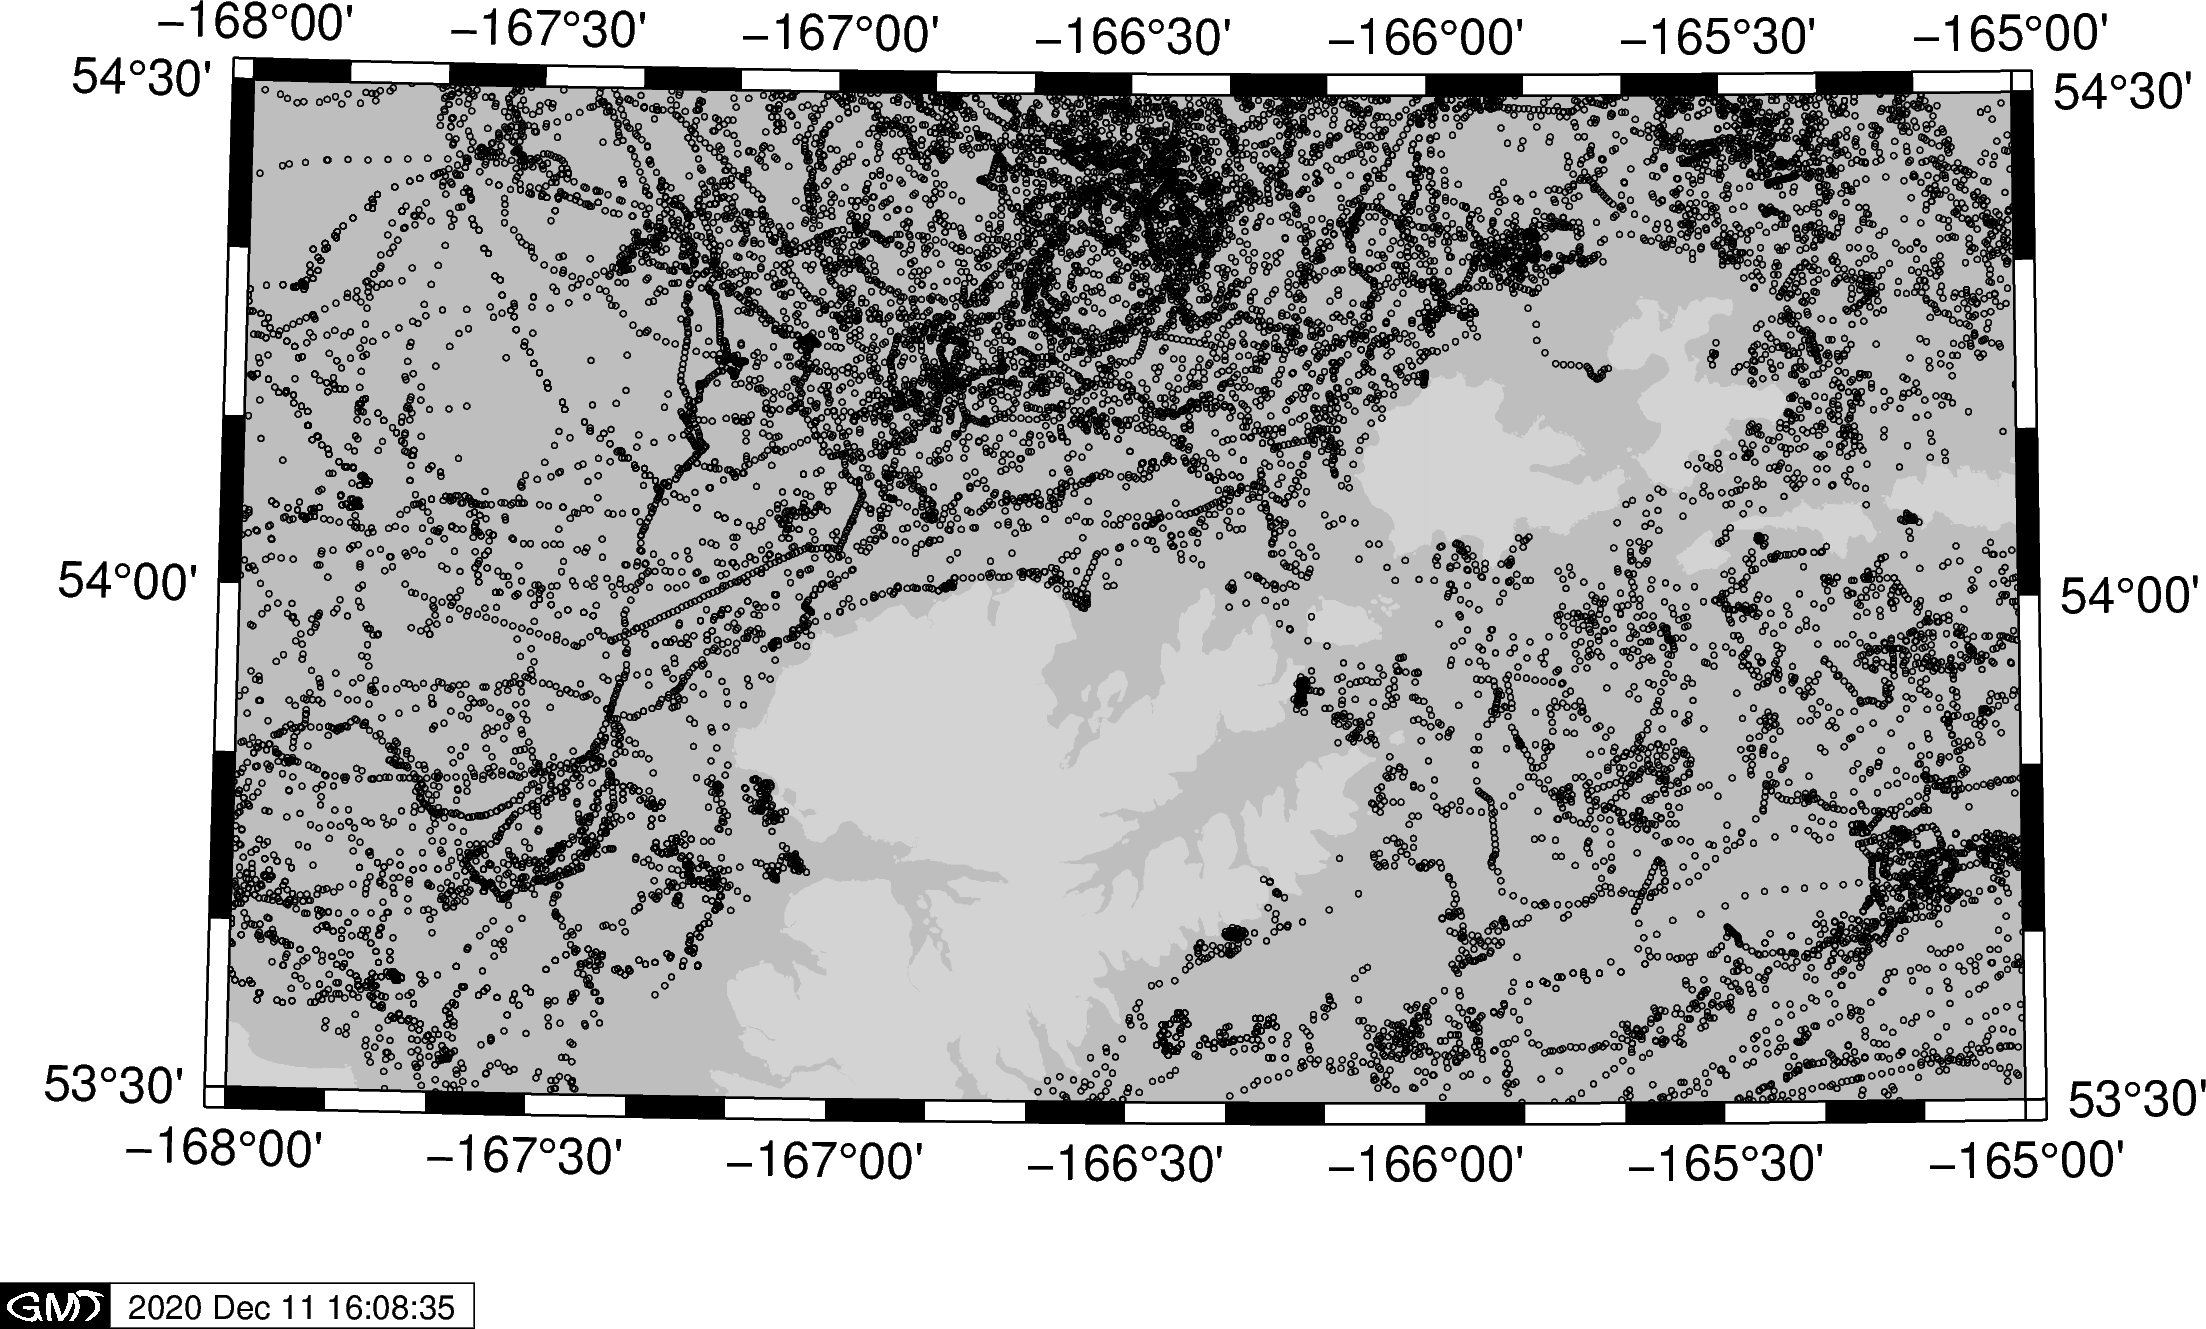

In [53]:
fig.show()

In [54]:
### drifters with potential hits

drifters_good = ['data1986/02327_y1986.asc',
'data1986/05611a_y1986.asc',
'data1986/05612_y1986.asc',
'data1986/07164_y1986.asc',
'data1986/y1986_02327.asc',
'data1986/y1986_07164.asc',
'data1987/07243_y1987.asc',
'data1987/y1987_07243.asc',
'data1988/07214_y1988.asc',
'data1988/07256_y1988.asc',
'data1988/y1988_07214.asc',
'data1988/y1988_07256.asc',
'data1989/07160_y1989.asc',
'data1989/y1989_07160.asc',
'data1989/y1989_07165.asc',
'data1989/y1989_07166.asc',
'data1990/07213_y1990.asc',
'data1990/y1990_07213.asc',
'data1991/07161_y1991.asc',
'data1991/07167_y1991.asc',
'data1991/y1991_07161.asc',
'data1991/y1991_07167.asc',
'data1992/07213_y1992.asc',
'data1992/y1992_07213.asc',
'data1993/07169_y1993.asc',
'data1993/07211_y1993.asc',
'data1993/07225_y1993.asc',
'data1993/07238_y1993.asc',
'data1993/07244_y1993.asc',
'data1993/y1993_07169.asc',
'data1993/y1993_07211.asc',
'data1993/y1993_07225.asc',
'data1993/y1993_07238.asc',
'data1993/y1993_07244.asc',
'data1994/07167_y1994.asc',
'data1994/y1994_07167.asc',
'data1994/y1994_07229.asc',
'data1995/y1995_07165.asc',
'data1996/y1996_07212.asc',
'data1996/y1996_07227.asc',
'data1996/y1996_07229.asc',
'data1997/29057_y1997.asc',
'data1997/29059_y1997.asc',
'data1997/29066_y1997.asc',
'data1997/y1997_29057.asc',
'data1997/y1997_29059.asc',
'data1997/y1997_29066.asc',
'data1998/01826_y1998.asc',
'data1998/y1998_01826.asc',
'data1999/15789_y1999.asc',
'data1999/15791_y1999.asc',
'data1999/20394_y1999.asc',
'data1999/20454_y1999.asc',
'data1999/20456_y1999.asc',
'data1999/20932_y1999.asc',
'data1999/y1999_15789.asc',
'data1999/y1999_15791.asc',
'data1999/y1999_20394.asc',
'data1999/y1999_20449.asc',
'data1999/y1999_20454.asc',
'data1999/y1999_20456.asc',
'data1999/y1999_20932.asc',
'data2000/19457_y2000.asc',
'data2000/19624_y2000.asc',
'data2000/19976_y2000.asc',
'data2000/19980_y2000.asc',
'data2000/20100_y2000.asc',
'data2000/20101_y2000.asc',
'data2000/29057_y2000.asc',
'data2001/13128_y2001.asc',
'data2001/13134_y2001.asc',
'data2001/13141_y2001.asc',
'data2001/13144_y2001.asc',
'data2001/13151_y2001.asc',
'data2001/13152_y2001.asc',
'data2001/13161_y2001.asc',
'data2002/22354_y2002.asc',
'data2002/23787_y2002.asc',
'data2002/34242_y2002.asc',
'data2002/34243_y2002.asc',
'data2002/34244_y2002.asc',
'data2002/34293_y2002.asc',
'data2002/36248_y2002.asc',
'data2002/36250_y2002.asc',
'data2002/36252_y2002.asc',
'data2002/36253_y2002.asc',
'data2002/36258_y2002.asc',
'data2002/36261_y2002.asc',
'data2002/36264_y2002.asc',
'data2002/36265_y2002.asc',
'data2002/37474_y2002.asc',
'data2002/37475_y2002.asc',
'data2002/37518_y2002.asc',
'data2003/37478_y2003.asc',
'data2003/37494_y2003.asc',
'data2003/37495_y2003.asc',
'data2003/37497_y2003.asc',
'data2003/37499_y2003.asc',
'data2003/37501_y2003.asc',
'data2003/37505_y2003.asc',
'data2003/37510_y2003.asc',
'data2003/37511_y2003.asc',
'data2003/37512_y2003.asc',
'data2003/37514_y2003.asc',
'data2004/43697b_y2004.asc',
'data2004/43700_y2004.asc',
'data2004/43707_y2004.asc',
'data2004/43738_y2004.asc',
'data2004/53287_y2004.asc',
'data2004/53289_y2004.asc',
'data2004/53291_y2004.asc',
'data2004/53292_y2004.asc',
'data2004/53293_y2004.asc',
'data2005/53295_y2005.asc',
'data2005/53318_y2005.asc',
'data2005/57889_y2005.asc',
'data2007/72429a_y2007.asc',
'data2007/72429b_y2007.asc',
'data2008/72431_y2008.asc',
'data2010/098684_y2010_withTandIce.asc',
'data2010/098684_y2010_withT.asc',
'data2010/098687_y2010_withTandIce.asc',
'data2013/111971_y2013_withTandIce.asc',
'data2013/111971_y2013_withT.asc',
'data2013/111976_y2013_withT.asc',
'data2013/122533_y2013_withT.asc',
'data2013/122542_y2013_withT.asc',
'data2013/122845_y2013_withT.asc',
'data2014/136871_y2014_withTandIce.asc',
'data2014/136871_y2014_withT.asc',
'data2014/136874_y2014_withT.asc',
'data2015/148277_y2015_withTandIce.asc',]

In [76]:
###list
data = {}
column_names=['latitude','longitude','year','doy','hhmm','drogue','battery','sst','satqual','ice']
column_names_alt=['year','doy','hhmm','latitude','longitude','speed','direction','ucomp','vcomp']
column_names_small=['latitude','longitude','year','doy','hhmm']

#function to parse dates that are three column information
dateparse = lambda x: pd.datetime.strptime(x, '%Y %j %H%M')

data={}

for ifloat in drifters_good:
    try:
        data.update({ifloat:pd.read_csv('https://www.ecofoci.noaa.gov/drifters/'+str(ifloat), 
                    dtype={'hhmm': str, 'year': str, 'doy': str},
                    header=29,
                    names=column_names,
                    delimiter='\s+',
                    parse_dates=[['year','doy','hhmm']],
                    date_parser=dateparse, 
                    index_col='year_doy_hhmm')})
        print('https://www.ecofoci.noaa.gov/drifters/'+str(ifloat))
    except:
        #2400 instead of 0000 is used
        try:
            data.update({ifloat:pd.read_csv('https://www.ecofoci.noaa.gov/drifters/'+str(ifloat), 
                    dtype={'hhmm': str, 'year': str, 'doy': str},
                    header=31,
                    names=column_names_alt,
                    delimiter='\s+',
                    parse_dates=[['year','doy','hhmm']],
                    date_parser=midmilitary, 
                    index_col='year_doy_hhmm')})
            print('https://www.ecofoci.noaa.gov/drifters/'+str(ifloat))
        except:
            try:
                data.update({ifloat:pd.read_csv('https://www.ecofoci.noaa.gov/drifters/'+str(ifloat), 
                        dtype={'hhmm': str, 'year': str, 'doy': str},
                        header=31,
                        names=column_names_small,
                        delimiter='\s+',
                        parse_dates=[['year','doy','hhmm']],
                        date_parser=dateparse, 
                        index_col='year_doy_hhmm')})
                print('https://www.ecofoci.noaa.gov/drifters/'+str(ifloat))
            except:
                print(f"invalid data format: {ifloat}")

<ipython-input-76-0401078ad6fd>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x, '%Y %j %H%M')


https://www.ecofoci.noaa.gov/drifters/data1986/02327_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/05611a_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/05612_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/07164_y1986.asc
https://www.ecofoci.noaa.gov/drifters/data1986/y1986_02327.asc
https://www.ecofoci.noaa.gov/drifters/data1986/y1986_07164.asc
https://www.ecofoci.noaa.gov/drifters/data1987/07243_y1987.asc
https://www.ecofoci.noaa.gov/drifters/data1987/y1987_07243.asc
https://www.ecofoci.noaa.gov/drifters/data1988/07214_y1988.asc
https://www.ecofoci.noaa.gov/drifters/data1988/07256_y1988.asc
https://www.ecofoci.noaa.gov/drifters/data1988/y1988_07214.asc
https://www.ecofoci.noaa.gov/drifters/data1988/y1988_07256.asc
https://www.ecofoci.noaa.gov/drifters/data1989/07160_y1989.asc
https://www.ecofoci.noaa.gov/drifters/data1989/y1989_07160.asc
https://www.ecofoci.noaa.gov/drifters/data1989/y1989_07165.asc
https://www.ecofoci.noaa.gov/drifters/data1989/y1989_0

## Carol Ladd selected region

In [11]:
fig = pygmt.Figure()

fig.coast(region=[-168, -165, 53.5, 54.5], projection='B-166/54/52/56/6i', land='lightgray', water='gray',
          frame=True,U=True)

In [14]:
for drifterid,ddata in data.items():
    ddata['dayofyear'] = ddata.index.dayofyear
    #dfmiss.dayofyear.loc[(df.dayofyear > 0) | (df.dayofyear < 366)] = np.nan
    # normalize data for colormap
    fig.plot(x=-1*ddata.longitude, y=ddata.latitude, style='c0.05c')

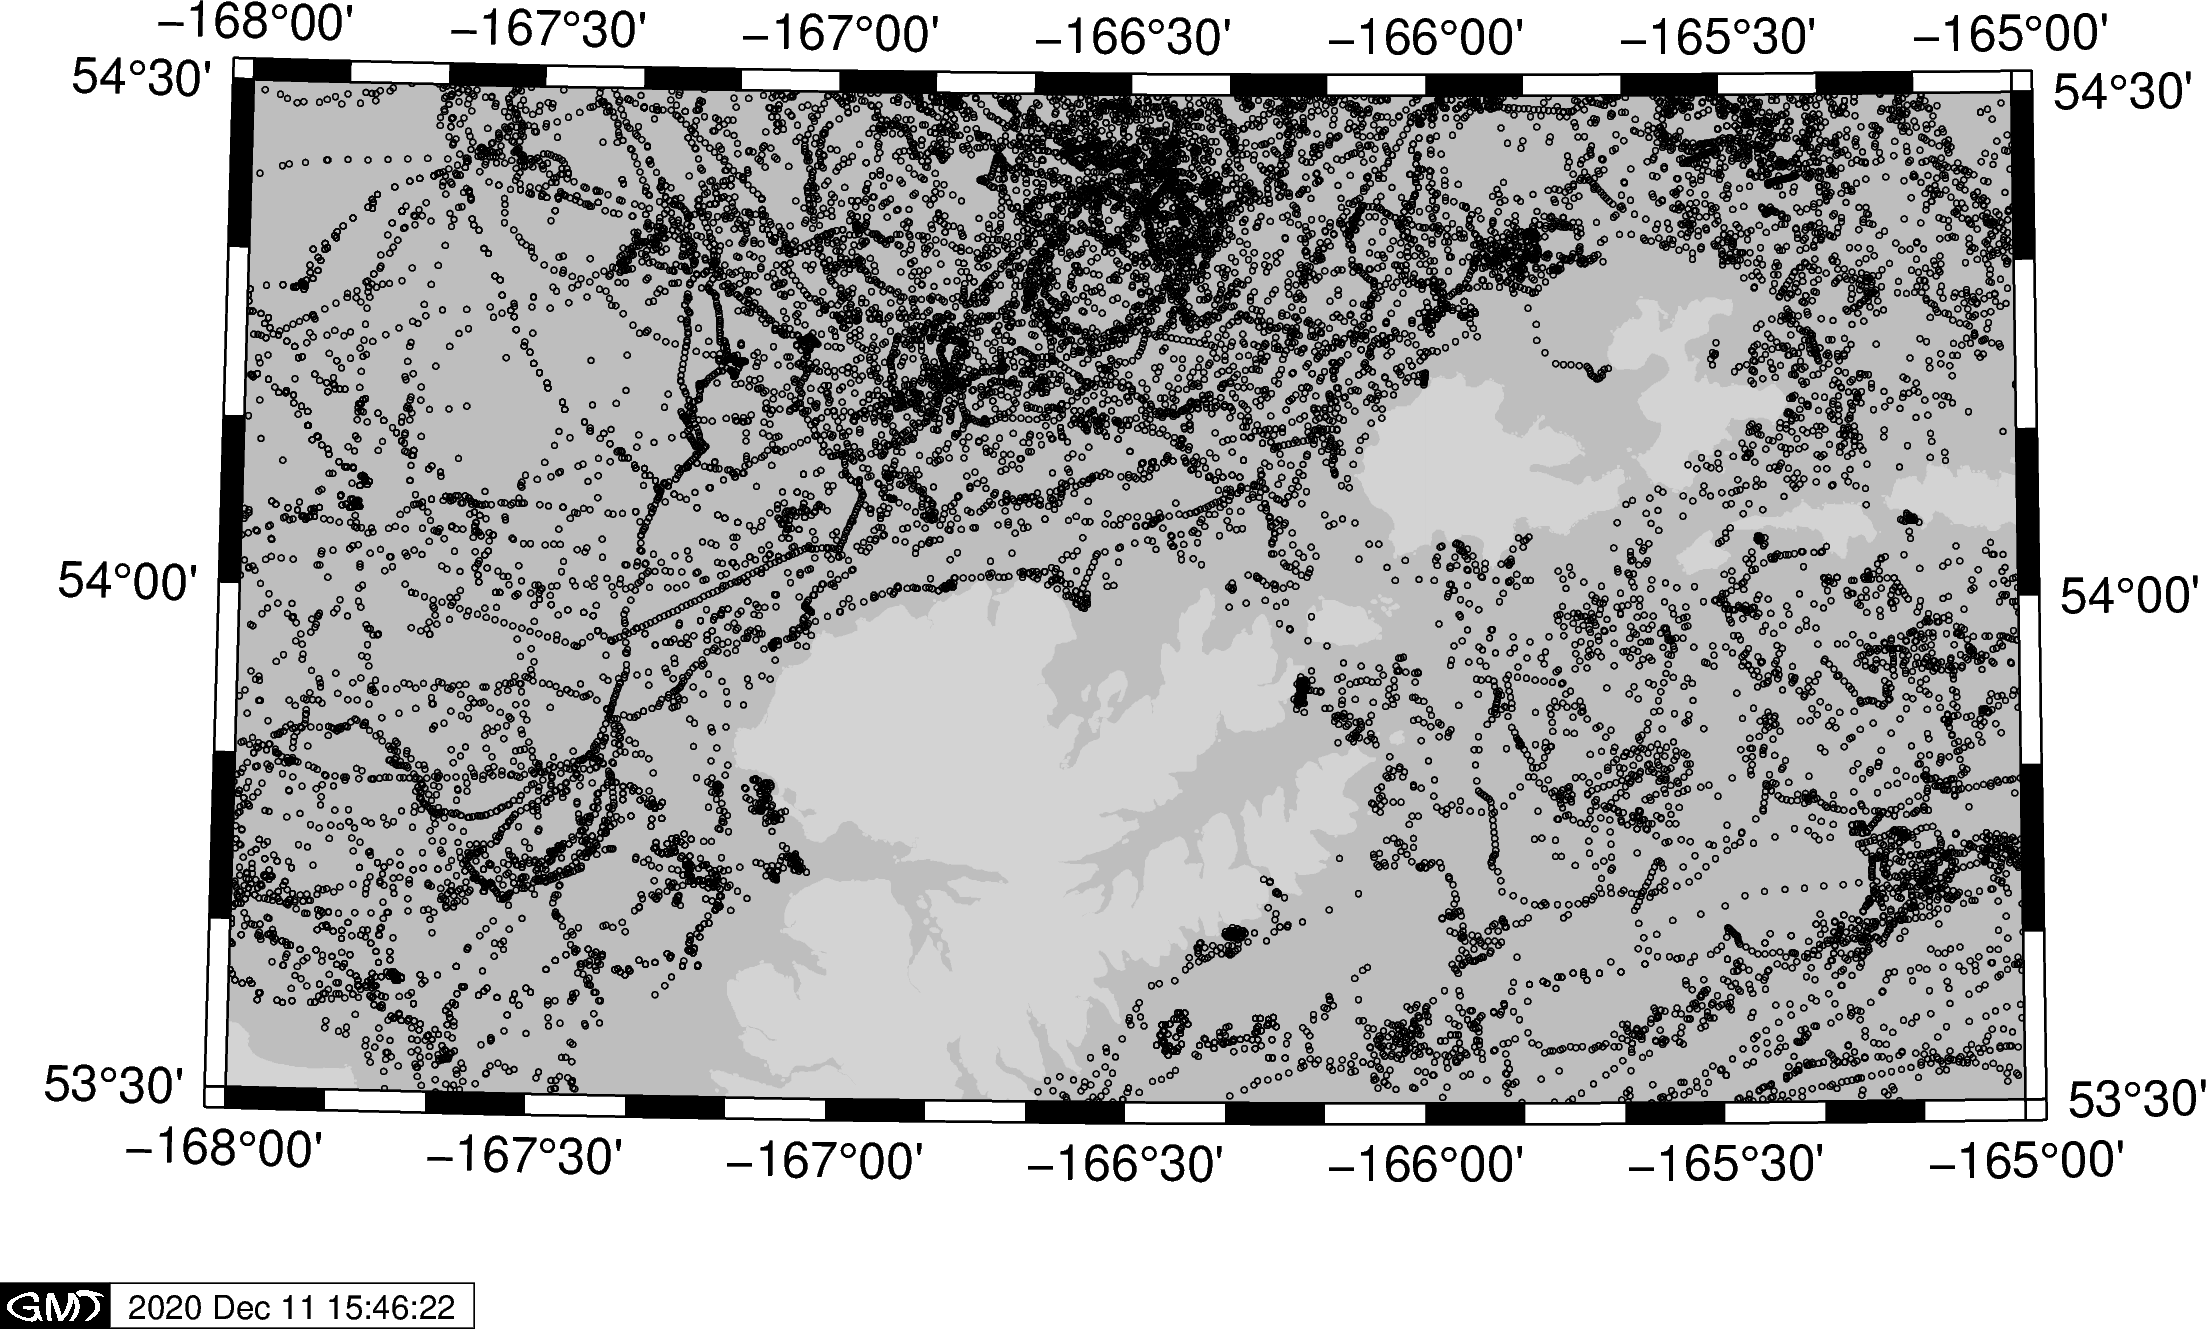

In [15]:
fig.show()

### subset the data into id's that had data between May1 and Sep30 (121-273) and where in the region in that time

In [77]:
for drifterid,odata in data.items():
    ddata = odata[(odata.index.dayofyear >= 121) & (odata.index.dayofyear <=273)]
    ddata = ddata[(ddata.latitude >=  53.5) & (ddata.latitude <= 54.5)]
    if not (ddata[(ddata.longitude >=  165) & (ddata.longitude <=  168)]).empty:
        print(drifterid)

data1986/07164_y1986.asc
data1986/y1986_07164.asc
data1987/07243_y1987.asc
data1987/y1987_07243.asc
data1990/07213_y1990.asc
data1990/y1990_07213.asc
data1991/07161_y1991.asc
data1991/07167_y1991.asc
data1991/y1991_07161.asc
data1991/y1991_07167.asc
data1993/07169_y1993.asc
data1993/07225_y1993.asc
data1993/07238_y1993.asc
data1993/07244_y1993.asc
data1993/y1993_07169.asc
data1993/y1993_07225.asc
data1993/y1993_07238.asc
data1993/y1993_07244.asc
data1994/07167_y1994.asc
data1994/y1994_07167.asc
data1997/29066_y1997.asc
data1997/y1997_29066.asc
data1998/01826_y1998.asc
data1998/y1998_01826.asc
data1999/15789_y1999.asc
data1999/20394_y1999.asc
data1999/20454_y1999.asc
data1999/20456_y1999.asc
data1999/20932_y1999.asc
data1999/y1999_15789.asc
data1999/y1999_20394.asc
data1999/y1999_20449.asc
data1999/y1999_20454.asc
data1999/y1999_20456.asc
data1999/y1999_20932.asc
data2000/19457_y2000.asc
data2000/19624_y2000.asc
data2000/19976_y2000.asc
data2000/19980_y2000.asc
data2000/20100_y2000.asc


In [73]:
ddata=data['data2012/113642_y2012_withTandIce.asc']

KeyError: 'data2012/113642_y2012_withTandIce.asc'

In [75]:
data.keys()

dict_keys(['data1986/02327_y1986.asc', 'data1986/05611a_y1986.asc', 'data1986/05612_y1986.asc', 'data1986/07164_y1986.asc', 'data1986/y1986_02327.asc', 'data1986/y1986_07164.asc', 'data1987/07243_y1987.asc', 'data1987/y1987_07243.asc', 'data1988/07214_y1988.asc', 'data1988/07256_y1988.asc', 'data1988/y1988_07214.asc', 'data1988/y1988_07256.asc', 'data1989/07160_y1989.asc', 'data1989/y1989_07160.asc', 'data1989/y1989_07165.asc', 'data1989/y1989_07166.asc', 'data1990/07213_y1990.asc', 'data1990/y1990_07213.asc', 'data1991/07161_y1991.asc', 'data1991/07167_y1991.asc', 'data1991/y1991_07161.asc', 'data1991/y1991_07167.asc', 'data1992/07213_y1992.asc', 'data1992/y1992_07213.asc', 'data1993/07169_y1993.asc', 'data1993/07211_y1993.asc', 'data1993/07225_y1993.asc', 'data1993/07238_y1993.asc', 'data1993/07244_y1993.asc', 'data1993/y1993_07169.asc', 'data1993/y1993_07211.asc', 'data1993/y1993_07225.asc', 'data1993/y1993_07238.asc', 'data1993/y1993_07244.asc', 'data1994/07167_y1994.asc', 'data199

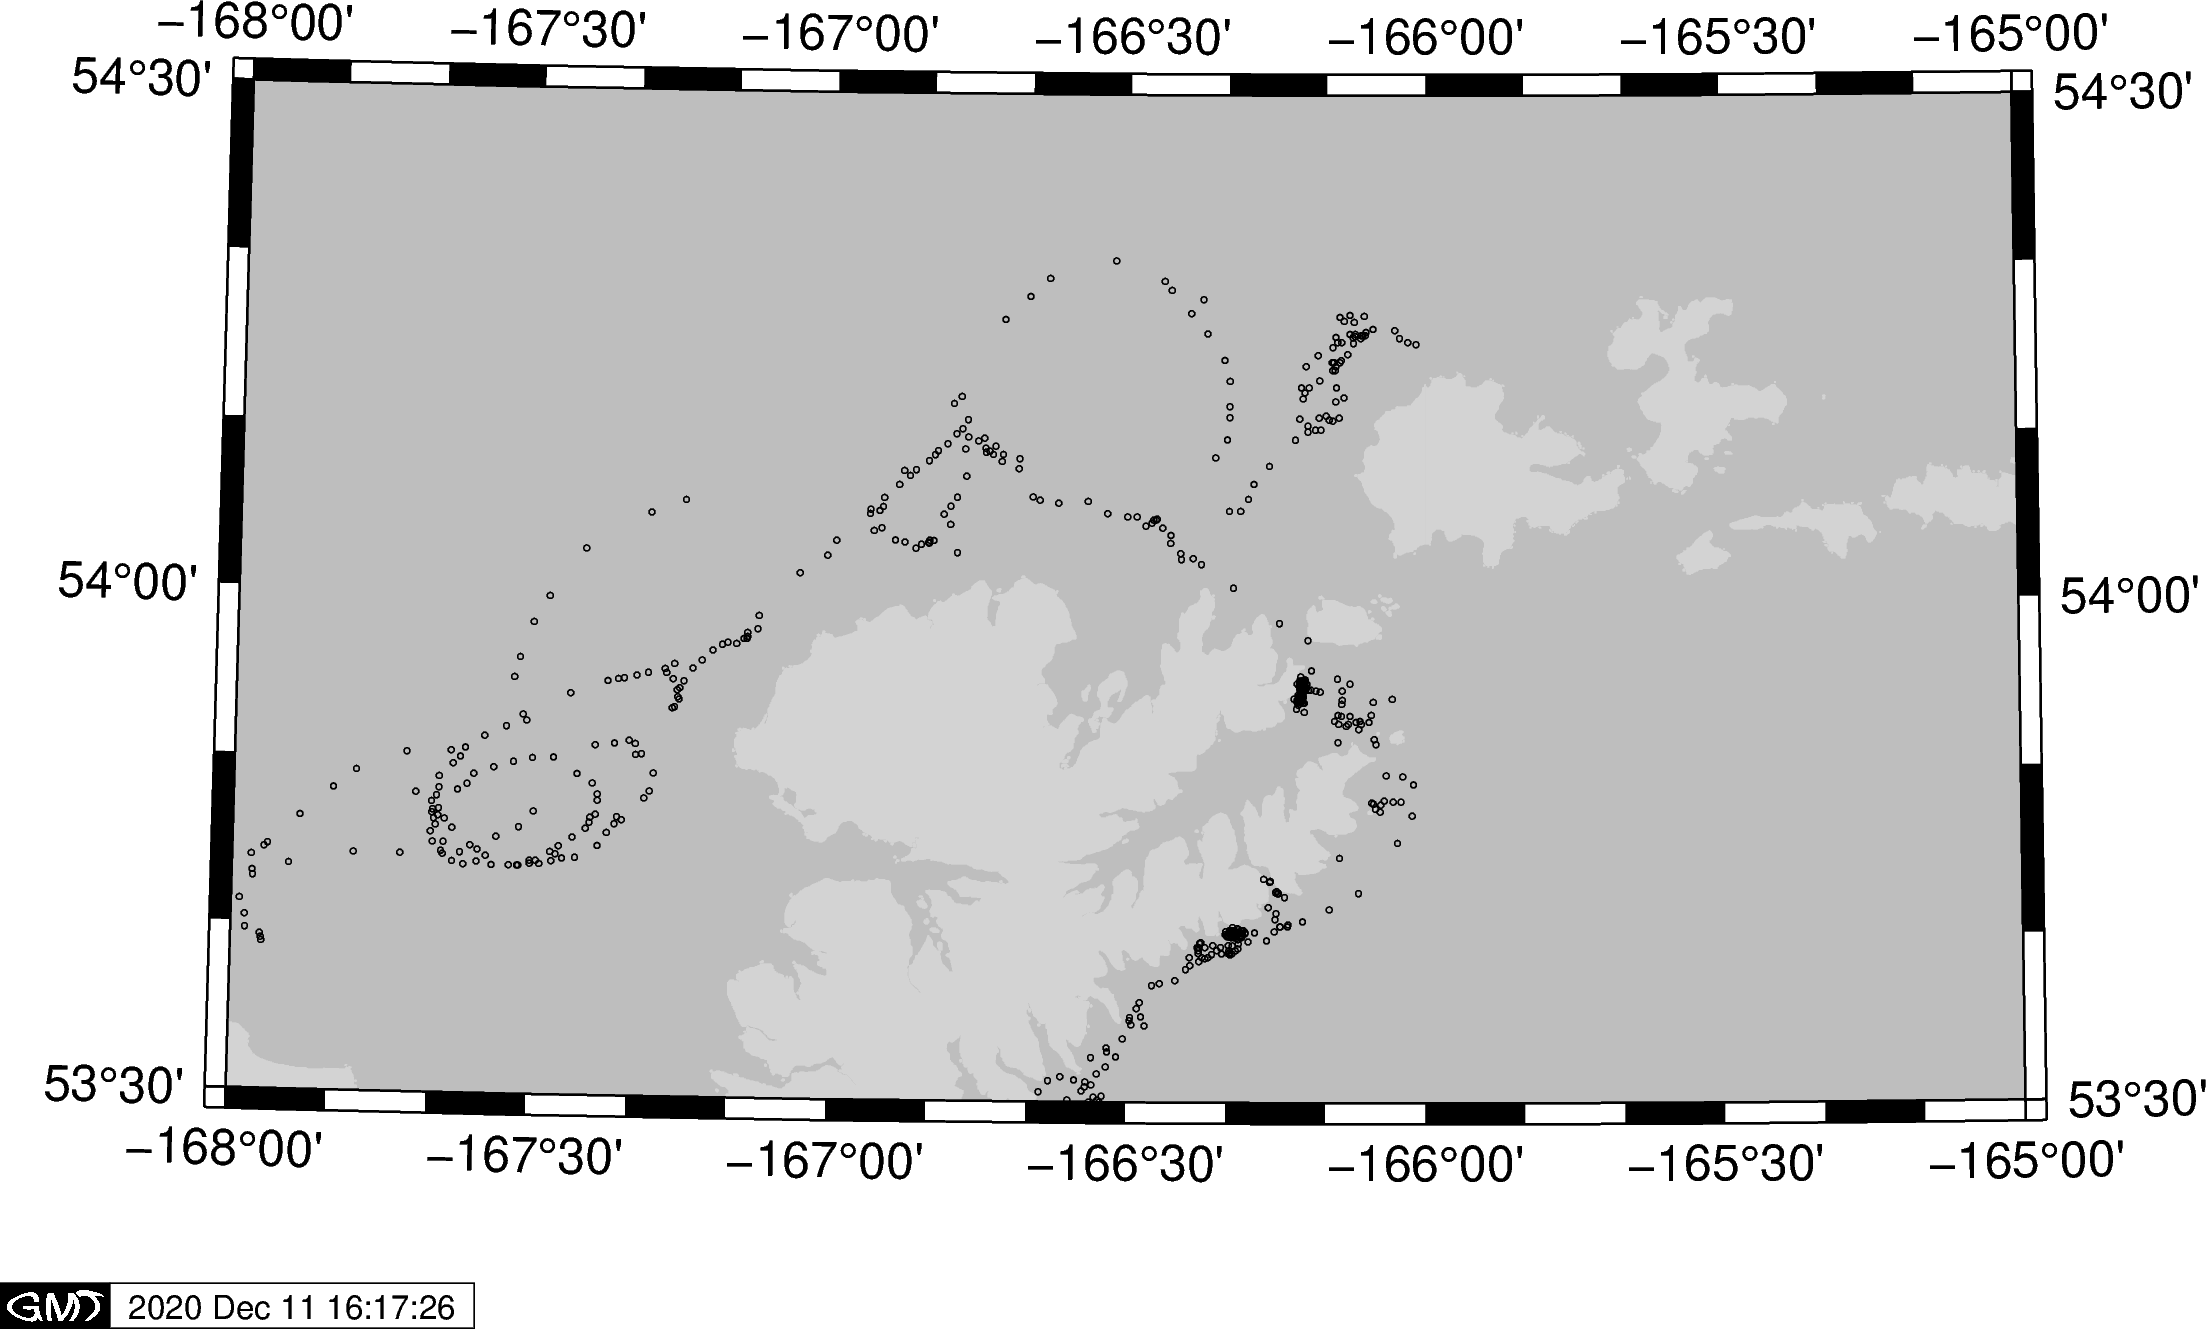

In [71]:
fig = pygmt.Figure()

fig.coast(region=[-168, -165, 53.5, 54.5], projection='B-166/54/52/56/6i', land='lightgray', water='gray',
          frame=True,U=True)


fig.plot(x=-1*ddata.longitude, y=ddata.latitude, style='c0.05c')

fig.show()